In [73]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet


In [75]:
df = pd.read_csv("Downloads//TATASTEEL.csv")

In [76]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-25,710.099976,730.700012,688.349976,723.150024,707.321289,36722400
1,2021-03-26,730.400024,774.900024,725.200012,766.849976,750.064758,42912247
2,2021-03-30,780.000000,810.000000,777.900024,800.000000,782.489136,28479468
3,2021-03-31,794.000000,823.500000,790.099976,811.849976,794.079773,28044585
4,2021-04-01,821.000000,868.900024,819.000000,863.049988,844.159058,36842098


In [77]:
df.Date

0      2021-03-25
1      2021-03-26
2      2021-03-30
3      2021-03-31
4      2021-04-01
          ...    
243    2022-03-21
244    2022-03-22
245    2022-03-23
246    2022-03-24
247    2022-03-25
Name: Date, Length: 248, dtype: object

In [78]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-25,710.099976,730.700012,688.349976,723.150024,707.321289,36722400
1,2021-03-26,730.400024,774.900024,725.200012,766.849976,750.064758,42912247
2,2021-03-30,780.000000,810.000000,777.900024,800.000000,782.489136,28479468
3,2021-03-31,794.000000,823.500000,790.099976,811.849976,794.079773,28044585
4,2021-04-01,821.000000,868.900024,819.000000,863.049988,844.159058,36842098


In [79]:
df_clean = df.drop(['Open','High','Low','Volume','Adj Close'], axis = 1)

<AxesSubplot:>

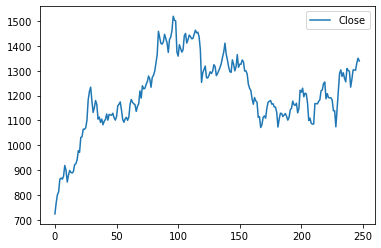

In [80]:
df_clean.plot()

In [81]:
df_clean.head()

,Date,Close
0,2021-03-25,723.150024
1,2021-03-26,766.849976
2,2021-03-30,800.000000
3,2021-03-31,811.849976
4,2021-04-01,863.049988


In [82]:
df_clean.columns = ['ds','y']
df_clean.head()

,ds,y
0,2021-03-25,723.150024
1,2021-03-26,766.849976
2,2021-03-30,800.000000
3,2021-03-31,811.849976
4,2021-04-01,863.049988


In [83]:
df_clean.describe()

,y
count,248.000000
mean,1206.511690
std,149.999900
min,723.150024
25%,1117.562500
50%,1190.875000
75%,1304.037476
max,1519.400024


In [84]:
df_clean.ds.dtypes

dtype('O')

In [86]:
df_clean.ds = pd.to_datetime(df_clean.ds)

In [87]:
df_clean.ds = df_clean.ds.dt.date

In [88]:
df_clean.head()

,ds,y
0,2021-03-25,723.150024
1,2021-03-26,766.849976
2,2021-03-30,800.000000
3,2021-03-31,811.849976
4,2021-04-01,863.049988


In [89]:
from fbprophet import Prophet

In [90]:
# Initialize the Model
model=Prophet(daily_seasonality = True)

In [91]:
model.fit(df_clean)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [92]:
### Create future dates of 365 days
future_data = model.make_future_dataframe(periods=30)

In [93]:
future_data.tail()

,ds
273,2022-04-20
274,2022-04-21
275,2022-04-22
276,2022-04-23
277,2022-04-24


In [94]:
forecast_data = model.predict(future_data)

In [95]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
273,2022-04-20,1323.326698,1246.191330,1400.320609
274,2022-04-21,1319.518256,1240.989479,1395.660009
275,2022-04-22,1319.215151,1242.056876,1398.940363
276,2022-04-23,1307.167058,1228.779661,1391.229365
277,2022-04-24,1308.861338,1233.732130,1379.418720


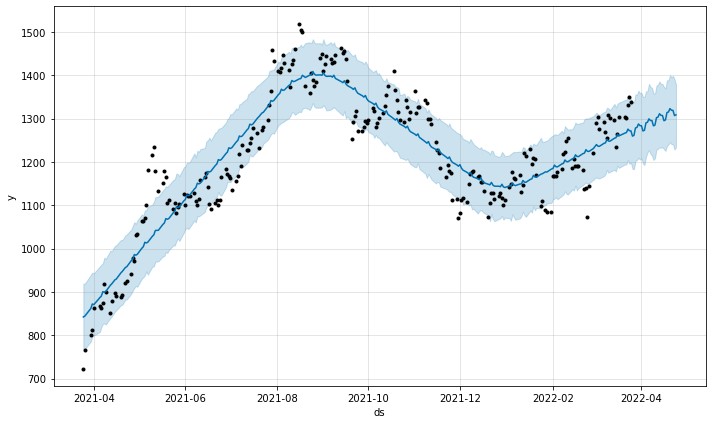

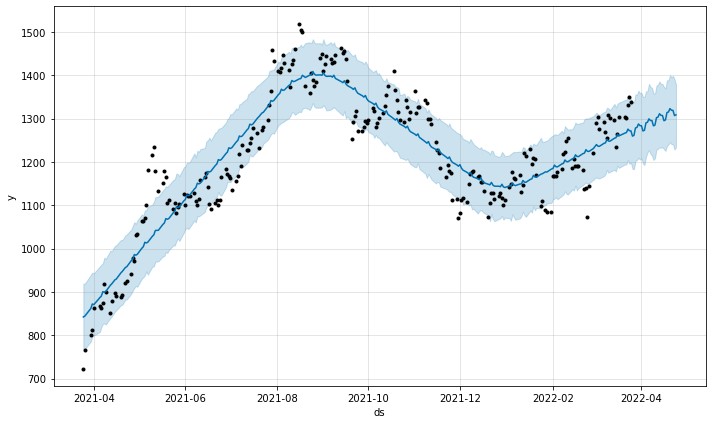

In [96]:
### plot the predicted projection
model.plot(forecast_data)

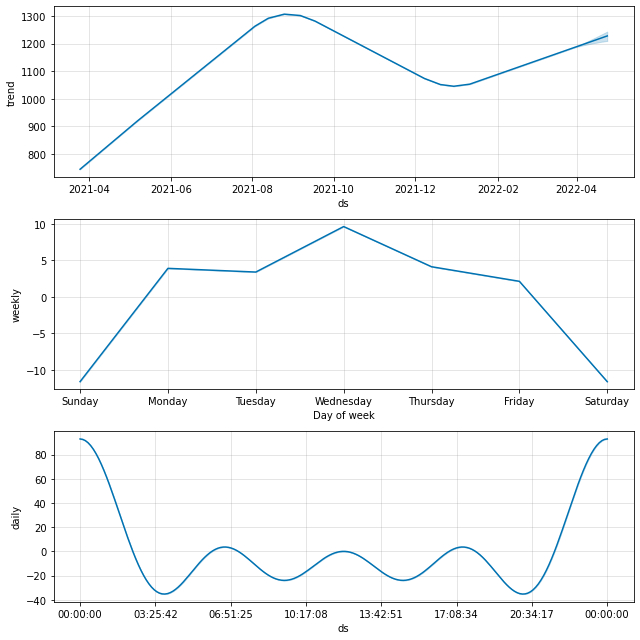

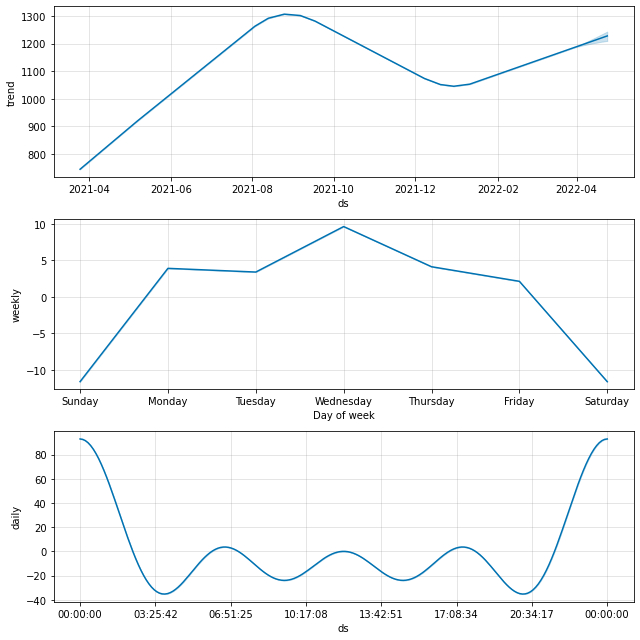

In [97]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(forecast_data)

In [98]:
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_clean["y"], name= 'Actual')
predict_chart = go.Scatter(y=forecast_data["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=forecast_data["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=forecast_data["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'